# Desafío Número 2: Equipo 7

## Introducción

Después de la limpieza del dataset de properati, levantamos la base limpia y generamos mas variables que no habiamos tenido presentes.
Una vez limpio el data frame con las variables necesarias analizamos el modelo de regresion lineal a utilizar.

<a id="section_dataset"></a> 

## Dataset

[volver a Indice](#section_indice)

In [1]:
# Importamos las librerías

%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import re

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm

In [23]:
#Levantamos el archivo de trabajo
data = pd.read_csv('../DESAFIO 2/properati_limpio.csv')

#Vusalizamos las primeras observaciones del data set
pd.set_option('display.max_columns', None)
data.head(3)


property_type place_name              state_name  \
0            PH  Mataderos         Capital Federal   
1     apartment   La Plata  Bs.As. G.B.A. Zona Sur   
2     apartment  Mataderos         Capital Federal   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   

                                               title  rooms_completo  PILETA  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB             0.0   False   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...             2.0   False   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO             0.0   False   

   PARRILLA  PATIO_JARDIN expenses_bool  expenses_nuevo  geonames_id_nuevo  \
0     False         False            NO        0.000000          3430787.0   
1     False         False            SI     3019.709032          3432039.0   
2     False         False            SI     1982.219551          3430787.0   

             lat-lon_nuevo  lat_nuevo  lon_nuevo  floor_copia  \
0  -34.6618237,-58.5088387 -34.661824 -58.508839          0.0   
1  -34.9038831,-57.9643295 -34.903883 -57.964330         10.0   
2  -34.6522615,-58.5229825 -34.652262 -58.522982          3.0   

  description_copia title_copia         ant  price_nuevo currency_nuevo  \
0               NaN         NaN       otros      62000.0            USD   
1               NaN         NaN  a_estrenar     150000.0            USD   
2               NaN         NaN       otros      72000.0            USD   

   price_aprox_local_currency_nuevo  price_aprox_usd_nuevo  \
0                         1093959.0                62000.0   
1                         2646675.0               150000.0   
2                         1270404.0                72000.0   

   surface_total_in_m2_nuevo  surface_covered_in_m2_nuevo  \
0                       55.0                         40.0   
1                        NaN                          NaN   
2                       55.0                         55.0   

   price_usd_per_m2_nuevo  price_per_m2_nuevo       pais  \
0             1127.272727        19890.163636  Argentina   
1                     NaN                 NaN  Argentina   
2             1309.090909        23098.254545  Argentina   

                provincia  localidad       zona     barrio      lugar  \
0         Capital Federal  Mataderos  Mataderos  Mataderos  Mataderos   
1  Bs.As. G.B.A. Zona Sur   La Plata   La Plata   La Plata   La Plata   
2         Capital Federal  Mataderos  Mataderos  Mataderos  Mataderos   

   es_outlier  
0  No outlier  
1  No outlier  
2  No outlier

In [24]:
data.shape

(83390, 34)

## Terminamos de limpiar los datos

### Metros cuadrados

In [25]:
data_m2_vs_description = data.loc[:,["surface_total_in_m2_nuevo","description"]]

In [26]:
mask = data_m2_vs_description["surface_total_in_m2_nuevo"].isnull()
data_m2_vs_description_nulos = data_m2_vs_description[mask]
data_m2_vs_description_nulos

surface_total_in_m2_nuevo  \
1                            NaN   
3                            NaN   
8                            NaN   
10                           NaN   
58                           NaN   
...                          ...   
83376                        NaN   
83377                        NaN   
83378                        NaN   
83379                        NaN   
83380                        NaN   

                                             description  
1      Venta de departamento en décimo piso al frente...  
3      PH 3 ambientes con patio. Hay 3 deptos en lote...  
8      MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...  
10     Entrada de Coche, Jardin, Living en desnivel, ...  
58     CODIGO: 1092-VENTA 6886 ubicado en: COMBET 688...  
...                                                  ...  
83376  PH al frente con entrada individual en primer ...  
83377  Casa en tres plantas con cochera para dos auto...  
83378  Depto. en primer piso por escalera, de dos hab...  
83379  Departamento al frente con balcón, dos dormito...  
83380  Monoambiente divisible en 3 piso al frente con...  

[26793 rows x 2 columns]

In [27]:
description_serie = data_m2_vs_description_nulos["description"]

In [28]:
patron2 = "\d+( ?)m2(c?)|\d+( ?)m²|\d+( ?)mts|\d+( ?)MT|\d+( ?) metros|\d+( ?)mt2|\d+( ?)M2(C?)"
regex2 = re.compile(patron2)
resultado = description_serie.apply(lambda x:  x if x is np.NaN else regex2.search(x))

In [29]:
numeros_match = resultado[resultado.notnull()].apply(lambda x: x.group(0))

In [30]:
sub_patron = "\d+"
sub_regex = re.compile(sub_patron)
resultado2 = numeros_match.apply(lambda x:  x if x is np.NaN else sub_regex.search(x))

In [31]:
numeros_match2 = resultado2[resultado2.notnull()].apply(lambda x: x.group(0))

In [32]:
surface_total_m2_actualizado = data["surface_total_in_m2_nuevo"].fillna(numeros_match2)
surface_total_m2_actualizado.head()

0     55
1    NaN
2     55
3    NaN
4     35
Name: surface_total_in_m2_nuevo, dtype: object

In [33]:
surface_total_m2_actualizado.isnull().sum()

17998

In [34]:
surface_total_m2_actualizado_con_sup_covered = surface_total_m2_actualizado.fillna(data.loc[:,"surface_covered_in_m2_nuevo"])
surface_total_m2_actualizado_con_sup_covered.isnull().sum()

4536

In [35]:
surface_total_m2_actualizado_con_sup_covered.shape

(83390,)

In [36]:
data['surface_total_in_m2_nuevo'] = surface_total_m2_actualizado_con_sup_covered

### Baños

In [37]:
#Creación de una nueva columna 'baños' vacía, la cual va a contener la cantidad de baños en una propiedad
data['baños'] = np.nan

In [38]:
#Comprobación de valores null en 'baños'
data['baños'].isnull().value_counts()

True    83390
Name: baños, dtype: int64

In [39]:
#Cambio a minúscula estas dos nuevas columnas creadas
data['description_copia'] = data['description'].astype(str).str.lower()
data['title_copia']= data['title'].astype(str).str.lower()

In [40]:
#Comprobación de valores null en data 'description_copia'
data['description_copia'].isnull().value_counts()

False    83390
Name: description_copia, dtype: int64

In [41]:
#Comprobación de valores null en data 'title_copia'
data['title_copia'].isnull().value_counts()

False    83390
Name: title_copia, dtype: int64

#### Búsqueda de baños con expresiones regulares: 

In [42]:
#defino la función cuenta_valores para ver cuántos valores nulos y no nulos hay en una columna.
def cuenta_valores(columna): 
    valores = data[columna].isnull().value_counts()
    
    return valores

In [43]:
#Defino la columna tabla_pivot_baños para obtener una tabla pivot con los datos que se van asignando a la columna baños, según el tipo de propiedad.
def tabla_pivot_baños():
    bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
    baños = pd.cut(data.baños, bins, right = False)
    tabla = data.pivot_table('baños', index = [baños], columns= 'property_type', aggfunc={'baños': 'count'})
    
    return tabla

In [44]:
patron = "\s(?P<numero>\d[\d]?)\s+baño[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [45]:
cuenta_valores('baños')

True     76309
False     7081
Name: baños, dtype: int64

In [46]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [47]:
patron =  "\s(?P<numero>\d[\d]?)\s+baã±o[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [48]:
cuenta_valores('baños')

True     75818
False     7572
Name: baños, dtype: int64

In [49]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [50]:
patron =  "\s(?P<numero>\d[\d]?)\s+bano[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [51]:
cuenta_valores('baños')

True     75647
False     7743
Name: baños, dtype: int64

In [52]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [53]:
patron =  "\sbaño[s]?\s*:\s*(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [54]:
cuenta_valores('baños')

True     75477
False     7913
Name: baños, dtype: int64

In [55]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [56]:
patron =  "\sbaã±o[s]?\s*:\s*(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [57]:
cuenta_valores('baños')

True     75471
False     7919
Name: baños, dtype: int64

In [58]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [59]:
patron =  "\sbano[s]?\s*:\s*(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [60]:
cuenta_valores('baños')

True     75469
False     7921
Name: baños, dtype: int64

In [61]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [62]:
patron = r"\s(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]*baño[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [63]:
data.loc[mask_description_notnull,'baños']= encontradas1.astype(float)

In [64]:
cuenta_valores('baños')

True     68763
False    14627
Name: baños, dtype: int64

In [65]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [66]:
patron = r"\s(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]*baã±o[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [67]:
data.loc[mask_description_notnull,'baños']= encontradas1.astype(float)

In [68]:
cuenta_valores('baños')

True     68139
False    15251
Name: baños, dtype: int64

In [69]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [70]:
patron = r"\s(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]*bano[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [71]:
data.loc[mask_description_notnull,'baños']= encontradas1.astype(float)

In [72]:
cuenta_valores('baños')

True     68034
False    15356
Name: baños, dtype: int64

In [73]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [74]:
patron = "baño"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [75]:
cuenta_valores('baños')

False    57438
True     25952
Name: baños, dtype: int64

In [76]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [77]:
patron = "baã±o"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [78]:
cuenta_valores('baños')

False    59049
True     24341
Name: baños, dtype: int64

In [79]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [80]:
patron = " bano "
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [81]:
cuenta_valores('baños')

False    59778
True     23612
Name: baños, dtype: int64

In [82]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [83]:
patron = "sanitario"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [84]:
cuenta_valores('baños')

False    60179
True     23211
Name: baños, dtype: int64

In [85]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [86]:
patron = "toilette"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [87]:
cuenta_valores('baños')

False    62097
True     21293
Name: baños, dtype: int64

In [88]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

In [89]:
patron = "inodoro"
description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [90]:
cuenta_valores('baños')

False    62111
True     21279
Name: baños, dtype: int64

In [91]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

#### Ahora busco con las mismas regex pero con la columna 'title_copia'

In [92]:
patron = "\s(?P<numero>\d[\d]?)\s+baño[s]?"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = (data['baños'].isnull()) & (description_series_match.notnull())
data.loc[mask_description_notnull, 'baños'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [93]:
cuenta_valores('baños')

False    62136
True     21254
Name: baños, dtype: int64

In [94]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [95]:
patron = "baño"
description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else x.count(patron))
mascarabanos = (data['baños'].isnull())&(description_series_match > 0)
data.loc[mascarabanos,'baños'] = description_series_match[mascarabanos] 

In [96]:
cuenta_valores('baños')

False    62165
True     21225
Name: baños, dtype: int64

In [97]:
data.loc[mascarabanos, ['description_copia', 'title_copia']] = ""

#### Imputación de NULLS

In [98]:
mask1 = (data['baños'].isnull()) & (data['property_type'] == 'PH')

In [99]:
data.loc[mask1, 'baños'] = 1

In [100]:
mask2 = (data['baños'].isnull()) & (data['property_type'] == 'apartment')

In [101]:
data.loc[mask2, 'baños'] = 1

In [102]:
mask3 = (data['baños'].isnull()) & (data['property_type'] == 'house')

In [103]:
data.loc[mask3, 'baños'] = 1

In [104]:
mask4 = (data['baños'].isnull()) & (data['property_type'] == 'store')

In [105]:
data.loc[mask4, 'baños'] = 1

In [106]:
tabla_pivot_baños()

property_type    PH  apartment  house  store
baños                                       
[0, 1)            0          0      0      0
[1, 2)         3943      38769  17575   2131
[2, 3)          851       6428   7620    414
[3, 4)          127       1211   2542     85
[4, 5)           34        344    738     27
[5, 6)            9        102    229     10
[6, 7)            0         48     82      2
[7, 8)            0          2     28      0
[8, 9)            0          3     10      0
[9, 15)           0          6     10      0
[15, 20)          0          1      0      0
[20, 30)          0          2      1      0
[30, 40)          0          0      2      0
[40, 50)          0          1      1      0
[50, 1000)        0          2      0      0
[1000, 2000)      0          0      0      0

## Seleccion de columnas necesarias

In [107]:
#Nos quedamos solo con las columnas necesarias

data = data.drop(['place_name', 'description', 'title', 'expenses_bool', 'expenses_nuevo', 'geonames_id_nuevo'\
                  , 'lat-lon_nuevo', 'lat_nuevo', 'lon_nuevo', 'description_copia', 'title_copia', 'currency_nuevo',\
                 'price_aprox_local_currency_nuevo', 'price_aprox_usd_nuevo', 'price_usd_per_m2_nuevo',\
                 'zona', 'barrio', 'lugar', 'es_outlier'], axis = 1)

In [108]:
data.head(3)

property_type              state_name  rooms_completo  PILETA  PARRILLA  \
0            PH         Capital Federal             0.0   False     False   
1     apartment  Bs.As. G.B.A. Zona Sur             2.0   False     False   
2     apartment         Capital Federal             0.0   False     False   

   PATIO_JARDIN  floor_copia         ant  price_nuevo  \
0         False          0.0       otros      62000.0   
1         False         10.0  a_estrenar     150000.0   
2         False          3.0       otros      72000.0   

  surface_total_in_m2_nuevo  surface_covered_in_m2_nuevo  price_per_m2_nuevo  \
0                        55                         40.0        19890.163636   
1                       NaN                          NaN                 NaN   
2                        55                         55.0        23098.254545   

        pais               provincia  localidad  baños  
0  Argentina         Capital Federal  Mataderos    1.0  
1  Argentina  Bs.As. G.B.A. Zona Sur   La Plata    1.0  
2  Argentina         Capital Federal  Mataderos    1.0

In [109]:
data.dtypes

property_type                   object
state_name                      object
rooms_completo                 float64
PILETA                            bool
PARRILLA                          bool
PATIO_JARDIN                      bool
floor_copia                    float64
ant                             object
price_nuevo                    float64
surface_total_in_m2_nuevo       object
surface_covered_in_m2_nuevo    float64
price_per_m2_nuevo             float64
pais                            object
provincia                       object
localidad                       object
baños                          float64
dtype: object

In [110]:
#En floor completamos con 0
data['floor_copia'].fillna(0, inplace = True)

In [111]:
data.isnull().sum()

property_type                      0
state_name                         0
rooms_completo                     0
PILETA                             0
PARRILLA                           0
PATIO_JARDIN                       0
floor_copia                        0
ant                                0
price_nuevo                        0
surface_total_in_m2_nuevo       4536
surface_covered_in_m2_nuevo    10427
price_per_m2_nuevo             26793
pais                               0
provincia                          0
localidad                          0
baños                              0
dtype: int64

## Generamos nuevas variables

### Precio por metro cuadrado

In [112]:
#Generamos la variable precio por metro cuadrado dividiendo el precio en dolares por los m2 totales

#Cambiamos superficie total en m2 a float
data['surface_total_in_m2_nuevo'] = pd.to_numeric(data['surface_total_in_m2_nuevo'],errors='coerce')
mask_price_per_m2_nuevo = data['surface_covered_in_m2_nuevo'].notnull()
data['price_per_m2'] = data.loc[mask_price_per_m2_nuevo, 'price_nuevo']/data.loc[mask_price_per_m2_nuevo, 'surface_covered_in_m2_nuevo']
data.head(3)

property_type              state_name  rooms_completo  PILETA  PARRILLA  \
0            PH         Capital Federal             0.0   False     False   
1     apartment  Bs.As. G.B.A. Zona Sur             2.0   False     False   
2     apartment         Capital Federal             0.0   False     False   

   PATIO_JARDIN  floor_copia         ant  price_nuevo  \
0         False          0.0       otros      62000.0   
1         False         10.0  a_estrenar     150000.0   
2         False          3.0       otros      72000.0   

   surface_total_in_m2_nuevo  surface_covered_in_m2_nuevo  price_per_m2_nuevo  \
0                       55.0                         40.0        19890.163636   
1                        NaN                          NaN                 NaN   
2                       55.0                         55.0        23098.254545   

        pais               provincia  localidad  baños  price_per_m2  
0  Argentina         Capital Federal  Mataderos    1.0   1550.000000  
1  Argentina  Bs.As. G.B.A. Zona Sur   La Plata    1.0           NaN  
2  Argentina         Capital Federal  Mataderos    1.0   1309.090909

In [113]:
mask_price_per_m2_nuevo2 = data['price_per_m2_nuevo'].isnull()
data.loc[mask_price_per_m2_nuevo2, 'price_per_m2_nuevo'] = data.loc[mask_price_per_m2_nuevo2, 'price_per_m2']
data.head(3)

property_type              state_name  rooms_completo  PILETA  PARRILLA  \
0            PH         Capital Federal             0.0   False     False   
1     apartment  Bs.As. G.B.A. Zona Sur             2.0   False     False   
2     apartment         Capital Federal             0.0   False     False   

   PATIO_JARDIN  floor_copia         ant  price_nuevo  \
0         False          0.0       otros      62000.0   
1         False         10.0  a_estrenar     150000.0   
2         False          3.0       otros      72000.0   

   surface_total_in_m2_nuevo  surface_covered_in_m2_nuevo  price_per_m2_nuevo  \
0                       55.0                         40.0        19890.163636   
1                        NaN                          NaN                 NaN   
2                       55.0                         55.0        23098.254545   

        pais               provincia  localidad  baños  price_per_m2  
0  Argentina         Capital Federal  Mataderos    1.0   1550.000000  
1  Argentina  Bs.As. G.B.A. Zona Sur   La Plata    1.0           NaN  
2  Argentina         Capital Federal  Mataderos    1.0   1309.090909

In [114]:
data.isnull().sum()

property_type                      0
state_name                         0
rooms_completo                     0
PILETA                             0
PARRILLA                           0
PATIO_JARDIN                       0
floor_copia                        0
ant                                0
price_nuevo                        0
surface_total_in_m2_nuevo       4536
surface_covered_in_m2_nuevo    10427
price_per_m2_nuevo              5989
pais                               0
provincia                          0
localidad                          0
baños                              0
price_per_m2                   10427
dtype: int64

In [115]:
data = data.dropna()
data.head(3)

property_type                    state_name  rooms_completo  PILETA  \
0            PH               Capital Federal             0.0   False   
2     apartment               Capital Federal             0.0   False   
4     apartment  Buenos Aires Costa Atlántica             1.0   False   

   PARRILLA  PATIO_JARDIN  floor_copia    ant  price_nuevo  \
0     False         False          0.0  otros      62000.0   
2     False         False          3.0  otros      72000.0   
4     False         False          0.0  otros      64000.0   

   surface_total_in_m2_nuevo  surface_covered_in_m2_nuevo  price_per_m2_nuevo  \
0                       55.0                         40.0        19890.163636   
2                       55.0                         55.0        23098.254545   
4                       35.0                         35.0        32264.228571   

        pais                     provincia      localidad  baños  price_per_m2  
0  Argentina               Capital Federal      Mataderos    1.0   1550.000000  
2  Argentina               Capital Federal      Mataderos    1.0   1309.090909  
4  Argentina  Buenos Aires Costa Atlántica  Mar del Plata    1.0   1828.571429

In [116]:
data = data.drop(['price_per_m2', 'price_nuevo'], axis = 1)

In [117]:
data.head()

property_type                    state_name  rooms_completo  PILETA  \
0            PH               Capital Federal             0.0   False   
2     apartment               Capital Federal             0.0   False   
4     apartment  Buenos Aires Costa Atlántica             1.0   False   
5            PH      Bs.As. G.B.A. Zona Norte             1.0   False   
6     apartment               Capital Federal             0.0    True   

   PARRILLA  PATIO_JARDIN  floor_copia    ant  surface_total_in_m2_nuevo  \
0     False         False          0.0  otros                       55.0   
2     False         False          3.0  otros                       55.0   
4     False         False          0.0  otros                       35.0   
5     False          True          0.0  otros                      106.0   
6     False         False          0.0  otros                       45.0   

   surface_covered_in_m2_nuevo  price_per_m2_nuevo       pais  \
0                         40.0        19890.163636  Argentina   
2                         55.0        23098.254545  Argentina   
4                         35.0        32264.228571  Argentina   
5                         78.0        21639.481132  Argentina   
6                         40.0        54109.800000  Argentina   

                      provincia      localidad  baños  
0               Capital Federal      Mataderos    1.0  
2               Capital Federal      Mataderos    1.0  
4  Buenos Aires Costa Atlántica  Mar del Plata    1.0  
5      Bs.As. G.B.A. Zona Norte  Vicente López    1.0  
6               Capital Federal       Belgrano    1.0

In [118]:
data.dtypes

property_type                   object
state_name                      object
rooms_completo                 float64
PILETA                            bool
PARRILLA                          bool
PATIO_JARDIN                      bool
floor_copia                    float64
ant                             object
surface_total_in_m2_nuevo      float64
surface_covered_in_m2_nuevo    float64
price_per_m2_nuevo             float64
pais                            object
provincia                       object
localidad                       object
baños                          float64
dtype: object

In [119]:
#Limpiamos los outliers

columnas_para_limpiar_outliers = ['floor_copia', 'surface_total_in_m2_nuevo', 'surface_covered_in_m2_nuevo', 'price_per_m2_nuevo']

for i in columnas_para_limpiar_outliers:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)


    iqr = (q3 - q1) * 1.5

    limite_superior = q3 + iqr
    limite_inferior = q1 - iqr

    outlier_mask_sup = data[i] > limite_superior
    outlier_mask_inf = data[i] < limite_inferior
    outlier_mask = np.logical_or(outlier_mask_sup, outlier_mask_inf)
    not_outliers = np.logical_not(outlier_mask)
    data = data[not_outliers]

## Limpiamos los casos excepcionales de Baños

In [120]:
data.baños.value_counts()

1.0     44147
2.0     10340
3.0      2278
4.0       559
5.0       166
6.0        50
7.0        10
8.0         5
10.0        4
12.0        2
9.0         2
30.0        1
71.0        1
13.0        1
21.0        1
41.0        1
Name: baños, dtype: int64

In [121]:
mask_muchos_baños = data.baños <= 10
data = data[mask_muchos_baños]

In [122]:
data.baños.value_counts()

1.0     44147
2.0     10340
3.0      2278
4.0       559
5.0       166
6.0        50
7.0        10
8.0         5
10.0        4
9.0         2
Name: baños, dtype: int64

In [123]:
data.describe()

rooms_completo   floor_copia  surface_total_in_m2_nuevo  \
count    57561.000000  57561.000000               57561.000000   
mean         1.227932      0.654697                 108.492903   
std          0.975156      1.112572                  81.994479   
min          0.000000      0.000000                   0.000000   
25%          1.000000      0.000000                  48.000000   
50%          1.000000      0.000000                  77.000000   
75%          2.000000      1.000000                 150.000000   
max         13.000000      5.000000                 425.000000   

       surface_covered_in_m2_nuevo  price_per_m2_nuevo         baños  
count                 57561.000000        57561.000000  57561.000000  
mean                     93.082000        25228.440720      1.306353  
std                      62.839243        19745.501353      0.646310  
min                       0.000000           60.000000      1.000000  
25%                      45.000000         3070.175439      1.000000  
50%                      70.000000        25206.428571      1.000000  
75%                     126.000000        38951.066038      1.000000  
max                     282.000000        94638.681818     10.000000

In [124]:
data.shape

(57561, 15)

## Analizamos si existe correlación entre variables

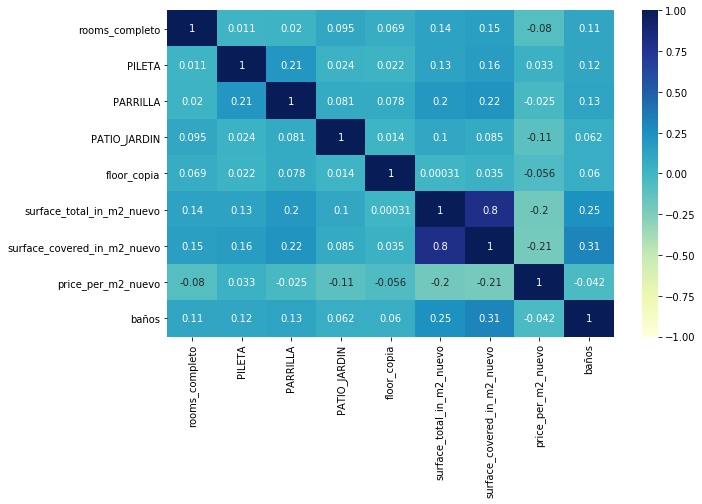

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu", annot = True);

## Generamos las variables dummies necesarias

In [137]:
#Generamos variables dummies
#columns = ['property_type', 'state_name', 'ant', 'pais', 'provincia', 'localidad']

#data = pd.get_dummies(data = data, drop_first = True)
data_dummies = pd.get_dummies(data = data, drop_first = True)

In [139]:
data_dummies.head()

rooms_completo  PILETA  PARRILLA  PATIO_JARDIN  floor_copia  \
0             0.0   False     False         False          0.0   
1             0.0   False     False         False          3.0   
2             1.0   False     False         False          0.0   
3             1.0   False     False          True          0.0   
4             0.0    True     False         False          0.0   

   surface_total_in_m2_nuevo  surface_covered_in_m2_nuevo  price_per_m2_nuevo  \
0                       55.0                         40.0        19890.163636   
1                       55.0                         55.0        23098.254545   
2                       35.0                         35.0        32264.228571   
3                      106.0                         78.0        21639.481132   
4                       45.0                         40.0        54109.800000   

   baños  property_type_apartment  property_type_house  property_type_store  \
0    1.0                        0                    0                    0   
1    1.0                        1                    0                    0   
2    1.0                        1                    0                    0   
3    1.0                        0                    0                    0   
4    1.0                        1                    0                    0   

   state_name_Bs.As. G.B.A. Zona Oeste  state_name_Bs.As. G.B.A. Zona Sur  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

   state_name_Buenos Aires Costa Atlántica  state_name_Buenos Aires Interior  \
0                                        0                                 0   
1                                        0                                 0   
2                                        1                                 0   
3                                        0                                 0   
4                                        0                                 0   

   state_name_Capital Federal  state_name_Catamarca  state_name_Chaco  \
0                           1                     0                 0   
1                           1                     0                 0   
2                           0                     0                 0   
3                           0                     0                 0   
4                           1                     0                 0   

   state_name_Chubut  state_name_Corrientes  state_name_Córdoba  \
0                  0                      0                   0   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   0   

   state_name_Entre Ríos  state_name_Jujuy  state_name_La Pampa  \
0                      0                 0                    0   
1                      0                 0                    0   
2                      0                 0                    0   
3                      0                 0                    0   
4                      0                 0                    0   

   state_name_La Rioja  state_name_Mendoza  state_name_Misiones  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   state_name_Neuquén  state_name_Río Negro  state_n

In [140]:
# Exportamos el archivo con los dummies
# data.to_csv(r'C:\Users\gbulgach\Desktop\Curso Data Science\Desafio 2\properati_limpio_con_dummies.csv', index = False)

In [141]:
data_dummies.describe()

rooms_completo   floor_copia  surface_total_in_m2_nuevo  \
count    72963.000000  72963.000000               7.296300e+04   
mean         1.248071      1.644395               2.729881e+02   
std          1.003174      8.863065               1.413781e+04   
min          0.000000      0.000000               0.000000e+00   
25%          1.000000      0.000000               5.000000e+01   
50%          1.000000      0.000000               8.300000e+01   
75%          2.000000      2.000000               1.910000e+02   
max         22.000000    905.000000               3.200136e+06   

       surface_covered_in_m2_nuevo  price_per_m2_nuevo         baños  \
count                 72963.000000        72963.000000  72963.000000   
mean                    121.571920        27212.121744      1.362307   
std                     764.697451        34896.365054      0.854955   
min                       0.000000            3.208556      1.000000   
25%                      46.000000         3000.000000      1.000000   
50%                      75.000000        23820.075000      1.000000   
75%                     150.000000        39034.138576      2.000000   
max                  187000.000000       850000.000000     71.000000   

       property_type_apartment  property_type_house  property_type_store  \
count             72963.000000         72963.000000         72963.000000   
mean                  0.569302             0.343023             0.028549   
std                   0.495177             0.474722             0.166535   
min                   0.000000             0.000000             0.000000   
25%                   0.000000             0.000000             0.000000   
50%                   1.000000             0.000000             0.000000   
75%                   1.000000             1.000000             0.000000   
max                   1.000000             1.000000             1.000000   

       state_name_Bs.As. G.B.A. Zona Oeste  state_name_Bs.As. G.B.A. Zona Sur  \
count                         72963.000000                       72963.000000   
mean                              0.079451                           0.125557   
std                               0.270444                           0.331351   
min                               0.000000                           0.000000   
25%                               0.000000                           0.000000   
50%                               0.000000                           0.000000   
75%                               0.000000                           0.000000   
max                               1.000000                           1.000000   

       state_name_Buenos Aires Costa Atlántica  \
count                             72963.000000   
mean                                  0.089360   
std                                   0.285265   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       state_name_Buenos Aires Interior  state_name_Capital Federal  \
count                      72963.000000                72963.000000   
mean                           0.017132                    0.328728   
std                            0.129764                    0.469754   
min                            0.000000                    0.000000   
25%                            0.000000                    0.000000   
50%                            0.000000                    0.000000   
75%                            0.000000                    1.000000   
max                            1.000000                    1.000000   

       state_name_Catamarca  state_name_Chaco  state_name_Chubut  \
count          72963.000000      72963.000000       72963.000000   
mean               0.000110          0.000137           0.000589   
std                0.010471          0.011706        

# Creamos nuevas variables a partir de las existentes

In [142]:
data_dummies['rooms_x_sup'] = data_dummies['rooms_completo']*data_dummies['surface_total_in_m2_nuevo']


# Generamos el modelo de regresion lineal multiple

#### Preparamos la matriz de features y el array target con la información del precio por m2 que queremos predecir

In [143]:
# data_dummies['state_name'] = data['state_name']

### Tomamos las features eliminando la variable a predecir, las que correlacionan con otras variables y las que tienen un p-value menor a 0.05

In [145]:
X = data_dummies.drop(['price_per_m2_nuevo'], axis = 1)

# X = data_dummies[['rooms_x_sup', 'rooms_completo', 'PILETA', 'PARRILLA', 'PATIO_JARDIN', \
#           'floor_copia', 'property_type_apartment', 'property_type_store', \
#           'state_name_Bs.As. G.B.A. Zona Oeste', 'state_name_Bs.As. G.B.A. Zona Sur', 'state_name_Buenos Aires Costa Atlántica', \
#           'state_name_Buenos Aires Interior', 'state_name_Capital Federal', 'state_name_Catamarca', \
#           'state_name_Corrientes', 'state_name_Córdoba', 'state_name_Entre Ríos',\
#           'state_name_La Pampa', 'state_name_Mendoza', 'state_name_Misiones', \
#           'state_name_Río Negro', 'state_name_San Luis', \
#           'state_name_Santa Fe', 'state_name_Tucumán', 'ant_otros', \
#           'baños_3.0', 'baños_5.0', 'baños_10.0']]

# X = data_dummies[['rooms_x_sup', 'surface_total_in_m2_nuevo', 'rooms_completo', 'PILETA', 'PARRILLA', 'PATIO_JARDIN', \
#           'floor_copia', 'property_type_apartment', 'property_type_house', 'property_type_store', \
#           'state_name_Bs.As. G.B.A. Zona Oeste', 'state_name_Bs.As. G.B.A. Zona Sur', 'state_name_Buenos Aires Costa Atlántica', \
#           'state_name_Buenos Aires Interior', 'state_name_Capital Federal', 'state_name_Catamarca', 'state_name_Chaco', \
#           'state_name_Chubut', 'state_name_Corrientes', 'state_name_Córdoba', 'state_name_Entre Ríos', 'state_name_Jujuy', \
#           'state_name_La Pampa', 'state_name_La Rioja', 'state_name_Mendoza', 'state_name_Misiones', 'state_name_Neuquén', \
#           'state_name_Río Negro', 'state_name_Salta', 'state_name_San Juan', 'state_name_San Luis', 'state_name_Santa Cruz', \
#           'state_name_Santa Fe', 'state_name_Santiago Del Estero', 'state_name_Tierra Del Fuego', 'state_name_Tucumán', 'ant_otros', \
#           'baños_2.0', 'baños_3.0',	'baños_4.0', 'baños_5.0', 'baños_6.0', 'baños_7.0', 'baños_8.0', 'baños_9.0', 'baños_10.0']]

# X = data_dummies[['surface_total_in_m2_nuevo', 'rooms_completo', 'PILETA', 'PARRILLA', 'PATIO_JARDIN', \
#           'floor_copia', 'property_type_apartment', 'property_type_house', 'property_type_store', \
#           'baños', 'state_name_Bs.As. G.B.A. Zona Oeste', 'state_name_Bs.As. G.B.A. Zona Sur', 'state_name_Buenos Aires Costa Atlántica', \
#           'state_name_Buenos Aires Interior', 'state_name_Capital Federal']]

# X = data_dummies[['surface_total_in_m2_nuevo', 'rooms_completo', 'baños', 'PILETA', 'PARRILLA', 'PATIO_JARDIN', \
#           'floor_copia', 'property_type_apartment', 'property_type_house', 'property_type_store', \
#           'state_name_Bs.As. G.B.A. Zona Oeste', 'state_name_Bs.As. G.B.A. Zona Sur', 'state_name_Buenos Aires Costa Atlántica', \
#           'state_name_Buenos Aires Interior', 'state_name_Capital Federal', 'state_name_Catamarca', 'state_name_Chaco', \
#           'state_name_Chubut', 'state_name_Corrientes', 'state_name_Córdoba', 'state_name_Entre Ríos', 'state_name_Jujuy', \
#           'state_name_La Pampa', 'state_name_La Rioja', 'state_name_Mendoza', 'state_name_Misiones', 'state_name_Neuquén', \
#           'state_name_Río Negro', 'state_name_Salta', 'state_name_San Juan', 'state_name_San Luis', 'state_name_Santa Cruz', \
#           'state_name_Santa Fe', 'state_name_Santiago Del Estero', 'state_name_Tierra Del Fuego', 'state_name_Tucumán', 'ant_otros', \
#          'baños']]


y = data_dummies['price_per_m2_nuevo']

In [146]:
print(X.shape)
print(y.shape)

(72963, 455)
(72963,)


### Hacemos el split entre train y test

In [147]:
#Hacemos el split entre train y test, tomando el 25% de los datos de manera 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54722, 455)
(18241, 455)
(54722,)
(18241,)


### Instanciamos y entrenamos el modelo con X_train e y_train

In [149]:
linreg = LinearRegression(normalize = True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Imprimimos los coeficientes y corremos la prediccion sobre X_test

In [150]:
print (linreg.intercept_)
print (linreg.coef_)

-1.1572396186735363e+17
[-4.54346534e+02  1.17980401e+03  1.21061842e+02 -2.67115855e+03
 -6.46063592e+01  1.87240766e-02 -3.15006913e-01 -3.09873270e+02
  1.15152108e+04 -4.74037138e+02  7.71614573e+03  8.64756156e+16
 -6.62121103e+16  2.03203848e+17 -2.33564916e+17  9.20860312e+16
 -5.45419349e+18  1.81772883e+18  9.95695661e+17  1.60458048e+17
 -6.19916677e+16  1.17651886e+18  4.87914559e+18  2.91006537e+18
  3.66615669e+18 -2.94899533e+17  6.35200625e+17 -2.72162194e+17
  4.67475745e+17  8.57429366e+17  5.07356064e+17 -3.39602691e+17
  8.83134557e+18 -4.28769191e+17 -8.89858422e+18  7.94847190e+18
  3.13689124e+18  2.06513693e+03  3.33642392e+16  1.31225571e+17
 -3.15287545e+17 -5.28076846e+16  2.36379307e+16  5.51920695e+18
 -1.10530781e+18  3.97760628e+18 -4.06181933e+16  1.27005128e+17
 -1.06079490e+18 -2.90446511e+18 -3.54363534e+18 -3.94043597e+18
  2.75239164e+17  3.62276322e+17 -1.18736998e+18  1.20520747e+18
 -4.68629294e+17 -1.03177899e+19  4.59442546e+17 -1.42181238e+19
 

In [151]:
y_pred = linreg.predict(X_test)
y_pred

array([37136., 13728., 36576., ..., 41376., 36352., 17696.])

In [152]:
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 1.148387836357175e+16
MSE: 1.8965709779965812e+35
RMSE: 4.354963809260166e+17
R2: -1.4618364774939606e+26


In [153]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

4.354963809260166e+17

In [154]:
linreg.score(X_train, y_train)

0.2942357386262271

In [155]:
linreg.score(X_test, y_test)

-1.4618364774939606e+26

## Generamos la regresion lineal regularizando con Lasso Regression

In [156]:
lassocv = linear_model.LassoCV(alphas=np.linspace(0.000001,1, 1000), cv=3, normalize=True)

In [163]:
lassocv.fit(X_train, y_train)
y_pred_lassocv = lassocv.predict(X_test)
print(y_pred_lassocv)

/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14721197280577.672, tolerance: 4281318245.398189
  tol, rng, random, positive)
/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5744393858.5546875, tolerance: 4461659699.769863
  tol, rng, random, positive)
/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15709403706387.17, tolerance: 4461659699.769863
  tol, rng, random, positive)
/home/miriam/anaconda3/envs/dsdhblend/lib/python3.7/site-packages/sklearn/lin

[35440.03352197 14134.07818834 30314.12252019 ... 39139.69990847
 34674.64275539 18886.28628762]


In [164]:
RMSE_lassocv = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lassocv))
RMSE_lassocv

31025.81273081543

In [165]:
lassocv_score_train = lassocv.score(X_train, y_train)
lassocv_score_train

0.2901932199778

In [166]:
lassocv_score_test = lassocv.score(X_test, y_test)
lassocv_score_test

0.2580476276991934

In [167]:
lassocv_alpha_optimo = lassocv.alpha_
lassocv_alpha_optimo

1.0

In [168]:
print (lassocv.intercept_)
print (lassocv.coef_)

14382.12202362888
[-3.45519384e+02  6.51089541e+02  0.00000000e+00 -1.96186247e+03
 -4.01457427e+01 -0.00000000e+00 -2.79858362e-01 -2.49930765e+01
  1.14032688e+04 -4.47293927e+02  6.42847798e+03 -6.07755049e+02
 -0.00000000e+00 -0.00000000e+00 -3.68915210e+03  8.29686300e+03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.44807684e+03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  5.88233203e+02 -3.75806852e+02 -0.00000000e+00
 -0.00000000e+00 -7.09514710e+02  4.83779205e+02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.94124891e+01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.000

(-0.049898950000000004, 1.05009995, 2510029203.1106553, 4630307943.538993)

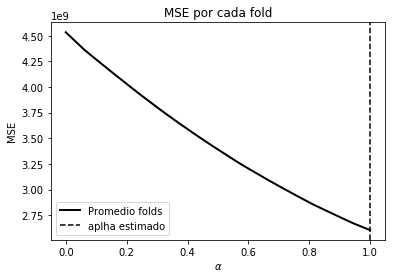

In [169]:
# Graficamos el alpha optimo
import time
EPSILON = 1e-4
t1 = time.time()
t_lasso_cv = time.time() - t1

plt.figure()
# ymin, ymax = 2300, 3800
# plt.semilogx(lassocv.alphas_ + EPSILON, lassocv.mse_path_, ':')
plt.plot(lassocv.alphas_ + EPSILON, lassocv.mse_path_.mean(axis=-1), 'k',
         label='Promedio folds', linewidth=2)
plt.axvline(lassocv.alpha_ + EPSILON, linestyle='--', color='k',
            label='aplha estimado')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.title('MSE por cada fold')
#           '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
# plt.ylim(ymin, ymax)

## Generamos la regresion lineal con Ridge Regression

In [170]:
Ridgecv = linear_model.RidgeCV(alphas=np.linspace(0.00000001,1, 500), cv=3, normalize=True)

In [171]:
Ridgecv.fit(X_train, y_train)
y_pred_Ridgecv = Ridgecv.predict(X_test)
y_pred_Ridgecv

array([36720.20428459, 15880.30052401, 35483.64800656, ...,
       39602.14815205, 32295.93163224, 19054.22010552])

In [133]:
RMSE_Ridgecv = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridgecv))
RMSE_Ridgecv

16530.43832891479

In [134]:
Ridgecv_score_train = Ridgecv.score(X_train, y_train)
Ridgecv_score_train

0.31778599060525436

In [135]:
Ridgecv_score_test = Ridgecv.score(X_test, y_test)
Ridgecv_score_test

0.29865603597569357

In [136]:
Ridgecv_alpha_optimo = Ridgecv.alpha_
Ridgecv_alpha_optimo

0.006012033987975951

In [137]:
Ridgecv.score

<bound method RegressorMixin.score of RidgeCV(alphas=array([1.00000000e-08, 2.00401800e-03, 4.00802599e-03, 6.01203399e-03,
       8.01604198e-03, 1.00200500e-02, 1.20240580e-02, 1.40280660e-02,
       1.60320740e-02, 1.80360820e-02, 2.00400900e-02, 2.20440980e-02,
       2.40481060e-02, 2.60521139e-02, 2.80561219e-02, 3.00601299e-02,
       3.20641379e-02, 3.40681459e-02, 3.60721539e-02, 3.80761619e-02,
       4.00801699e-02, 4.20841779e-0...
       9.61923848e-01, 9.63927856e-01, 9.65931864e-01, 9.67935872e-01,
       9.69939880e-01, 9.71943888e-01, 9.73947896e-01, 9.75951904e-01,
       9.77955912e-01, 9.79959920e-01, 9.81963928e-01, 9.83967936e-01,
       9.85971944e-01, 9.87975952e-01, 9.89979960e-01, 9.91983968e-01,
       9.93987976e-01, 9.95991984e-01, 9.97995992e-01, 1.00000000e+00]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)>

## Generamos la regresion lineal con Elastic Net

In [138]:
#Instanciamos el modelo
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=3)

In [139]:
#Buscamos los hiperparametros 
search.fit(X,y)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [140]:
search.best_score_

-276420108.7004717

In [141]:
elastic_net = linear_model.ElasticNet(alpha=0.00001, l1_ratio = 0.8, normalize=True)

In [142]:
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
y_pred_elastic_net

array([ 8894.08698074, 25503.56646184, 34311.18013302, ...,
       17964.13471237, 22601.28176448, 30953.13793481])

In [143]:
elastic_net_score_train = elastic_net.score(X_train, y_train)
elastic_net_score_train

0.31591809226873857

In [144]:
elastic_net_score_test = elastic_net.score(X_test, y_test)
elastic_net_score_test

0.29801494486481594

In [145]:
print('lassocv_score_train:', lassocv_score_train, 'lassocv_score_test:', lassocv_score_test)

lassocv_score_train: 0.3177991425982173 lassocv_score_test: 0.2985666369453006


In [146]:
print('Ridgecv_score_train:', Ridgecv_score_train, 'Ridgecv_score_test:', Ridgecv_score_test)

Ridgecv_score_train: 0.31778599060525436 Ridgecv_score_test: 0.29865603597569357


In [147]:
print('Elastic_net_score_train:', elastic_net_score_train, 'Elastic_net_score_test:', elastic_net_score_test)

Elastic_net_score_train: 0.31591809226873857 Elastic_net_score_test: 0.29801494486481594


# Regresion con Ordinary Least Squares y Statsmodel

In [148]:
results = sm.OLS(y_train, sm.add_constant(X_train.astype(float))).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Ordinary least squares
======================================================================================================
Model:                          OLS                          Adj. R-squared:               0.317      
Dependent Variable:             price_per_m2_nuevo           AIC:                          960125.6043
Date:                           2020-06-24 14:30             BIC:                          960793.4177
No. Observations:               43170                        Log-Likelihood:               -4.7999e+05
Df Model:                       76                           F-statistic:                  264.1      
Df Residuals:                   43093                        Prob (F-statistic):           0.00       
R-squared:                      0.318                        Scale:                        2.6651e+08 
------------------------------------------------------------------------------------------------------
                                           Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
------------------------------------------------------------------------------------------------------
const                                    15869.4985   490.9559  32.3237 0.0000  14907.2155  16831.7814
rooms_completo                            -778.6553   125.1941  -6.2196 0.0000  -1024.0382   -533.2724
PILETA                                    2672.9306   258.1152  10.3556 0.0000   2167.0199   3178.8412
PARRILLA                                  1386.1138   202.8476   6.8333 0.0000    988.5287   1783.6989
PATIO_JARDIN                             -2655.4409   226.5915 -11.7191 0.0000  -3099.5647  -2211.3172
floor_copia                              -1090.8138    71.7357 -15.2060 0.0000  -1231.4171   -950.2106
surface_covered_in_m2_nuevo                -14.7917     1.8883  -7.8335 0.0000    -18.4927    -11.0906
property_type_apartment                   9630.7094   323.0245  29.8142 0.0000   8997.5754  10263.8435
property_type_house                       -141.8438   357.0978  -0.3972 0.6912   -841.7623    558.0746
property_type_store                       5420.3275   573.1917   9.4564 0.0000   4296.8609   6543.7941
state_name_Buenos Aires Costa Atlántica  -1230.5990   507.8470  -2.4232 0.0154  -2225.9889   -235.2091
state_name_Buenos Aires Interior         -2346.8394   428.3718  -5.4785 0.0000  -3186.4563  -1507.2226
state_name_Capital Federal                5608.3586   125.2811  44.7662 0.0000   5362.8053   5853.9118
state_name_Córdoba                       -3198.1021   210.5446 -15.1897 0.0000  -3610.7734  -2785.4307
ant_otros                                 -786.4168   326.3383  -2.4098 0.0160  -1426.0461   -146.7876
provincia_Buenos Aires Costa Atlántica   -1230.5990   507.8470  -2.4232 0.0154  -2225.9889   -235.2091
provincia_Buenos Aires Interior          -2346.8394   428.3718  -5.4785 0.0000  -3186.4563  -1507.2226
provincia_Capital Federal                 5608.3586   125.2811  44.7662 0.0000   5362.8053   5853.9118
provincia_Córdoba                        -3198.1021   210.5446 -15.1897 0.0000  -3610.7734  -2785.4307
localidad_Balvanera                      -5756.4294   953.1416  -6.0394 0.0000  -7624.6051  -3888.2537
localidad_Barrio Norte                   12487.8714   706.8425  17.6671 0.0000  11102.4466  13873.2962
localidad_Belgrano                       10943.4850   516.5774  21.1846 0.0000   9930.9836  11955.9865
localidad_Bella Vista                    23143.8159  9428.3582   2.4547 0.0141   4664.0545  41623.5774
localidad_Boca                           -8161.8681  1694.7719  -4.8159 0.0000 -11483.6534  -4840.0829
localidad_Brandsen                        9011.2753  6719.4983   1.3411 0.1799  -4159.0692  22181.6198
localidad_Cariló                         14858.7461  4639.6854   3.2025 0.0014   5764.8744  23952.6177
localidad_Chascomús                      11759.6110  4050.2778   2.9034 0

In [149]:
mascara_pvalue_mayor = results.pvalues>0.05
results.pvalues[mascara_pvalue_mayor].index.tolist()

['property_type_house',
 'localidad_Brandsen',
 'localidad_Dina Huapi',
 'localidad_General San Martín',
 'localidad_José C Paz',
 'localidad_Río Negro',
 'localidad_Tandil',
 'localidad_Villa Cura Brochero',
 'localidad_Villa Mercedes',
 'baños_9.0',
 'baños_10.0']

In [150]:
results = sm.OLS(y_test, sm.add_constant(X_test.astype(float))).fit()
results.summary2()

C:\Users\gbulgach\AppData\Local\Continuum\anaconda3\envs\dhdsblend\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\gbulgach\AppData\Local\Continuum\anaconda3\envs\dhdsblend\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\gbulgach\AppData\Local\Continuum\anaconda3\envs\dhdsblend\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\gbulgach\AppData\Local\Continuum\anaconda3\envs\dhdsblend\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Ordinary least squares
====================================================================================================
Model:                        OLS                          Adj. R-squared:               0.300      
Dependent Variable:           price_per_m2_nuevo           AIC:                          320440.3904
Date:                         2020-06-24 14:30             BIC:                          320963.0211
No. Observations:             14391                        Log-Likelihood:               -1.6015e+05
Df Model:                     68                           F-statistic:                  91.70      
Df Residuals:                 14322                        Prob (F-statistic):           0.00       
R-squared:                    0.303                        Scale:                        2.7275e+08 
----------------------------------------------------------------------------------------------------
                                           Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
----------------------------------------------------------------------------------------------------
const                                    17375.4294   856.8394 20.2785 0.0000  15695.9132 19054.9457
rooms_completo                            -880.4521   222.1319 -3.9636 0.0001  -1315.8594  -445.0447
PILETA                                    2281.0119   450.2449  5.0662 0.0000   1398.4736  3163.5503
PARRILLA                                  1489.0545   352.2490  4.2273 0.0000    798.6008  2179.5081
PATIO_JARDIN                             -2630.9059   392.7681 -6.6984 0.0000  -3400.7822 -1861.0295
floor_copia                              -1118.8073   125.8290 -8.8915 0.0000  -1365.4485  -872.1662
surface_covered_in_m2_nuevo                -19.5941     3.2862 -5.9626 0.0000    -26.0354   -13.1527
property_type_apartment                   8426.0737   564.7931 14.9189 0.0000   7319.0061  9533.1413
property_type_house                       -461.2405   627.1897 -0.7354 0.4621  -1690.6136   768.1325
property_type_store                       7651.8905  1017.4704  7.5205 0.0000   5657.5166  9646.2643
state_name_Buenos Aires Costa Atlántica   -666.7971   997.8200 -0.6683 0.5040  -2622.6536  1289.0594
state_name_Buenos Aires Interior         -1939.5334   816.6280 -2.3751 0.0176  -3540.2301  -338.8366
state_name_Capital Federal                5448.7399   219.6588 24.8055 0.0000   5018.1801  5879.2996
state_name_Córdoba                       -3233.2047   378.5721 -8.5405 0.0000  -3975.2551 -2491.1543
ant_otros                                 -813.4600   568.7678 -1.4302 0.1527  -1928.3186   301.3986
provincia_Buenos Aires Costa Atlántica    -666.7971   997.8200 -0.6683 0.5040  -2622.6536  1289.0594
provincia_Buenos Aires Interior          -1939.5334   816.6280 -2.3751 0.0176  -3540.2301  -338.8366
provincia_Capital Federal                 5448.7399   219.6588 24.8055 0.0000   5018.1801  5879.2996
provincia_Córdoba                        -3233.2047   378.5721 -8.5405 0.0000  -3975.2551 -2491.1543
localidad_Balvanera                      -6742.0343  1571.5568 -4.2900 0.0000  -9822.4893 -3661.5793
localidad_Barrio Norte                   14012.4042  1347.3513 10.4000 0.0000  11371.4209 16653.3875
localidad_Belgrano                       11428.9713   891.8843 12.8144 0.0000   9680.7624 13177.1801
localidad_Bella Vista                       -0.0000     0.0000 -0.5241 0.6002     -0.0000     0.0000
localidad_Boca                           -8559.6033  3035.6687 -2.8197 0.0048 -14509.9075 -2609.2992
localidad_Brandsen                       21743.5237 11795.9308  1.8433 0.0653  -1378.0298 44865.0771
localidad_Cariló                         12169.5403  5855.0559  2.0785 0.0377    692.8716 23646.2089
localidad_Chascomús                       8965.0043  7561.1815  1.1857 0.2358  -5855.8916 23785.9003
localidad_Congreso                       -5679.

# Descenso de gradente

In [151]:
# Creamos la funcion de Descenso del gradiente.


def descenso_del_gradiente(X_train,y_train,num_steps = 100,learningRate = 0.10,criteria = 1e-5):
    """
    Toma como parametros la variable predicora X y la variable target.
    Se establece como parametros opcionales:
    num_steps: que define la cantidad máxima de saltos como un criterio de salida
    learning_rate: define la velocidad de aprendizaje
    criteria: define un segundo criterio de salida cuando el error es inferior a ese valor.
    """
    
    b_0 = 1
    b_1 = 1
    
    # en esta variable vamos a almacenar el MSE de la corrida anterior para luego calcular 
    # cuanto se redujo el error en un salto de gradiente.
    mse_previo = 0
    
    # Proceso iterativo como máximo realiza num_steps loops.
    for step in range(0, num_steps):
        
        #luego de inicializar los parametros calulamos el MSE actual para esos parametros
        mse_actual = metrics.mean_squared_error(y_train,  b_0 + b_1*X_train)
        
        # Plot
        plt.figure(figsize=(8,4))
        plt.scatter(X_train, y_train, alpha=0.5)
        plt.plot(X_train, b_0 + b_1*X_train)
        plt.title('step: ' + str(step+1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.text(3, 6, "b0  = " + str(b_0))
        plt.text(3, 5, "b1  = " + str(b_1))
        plt.text(3, 4, "MSE = " + str(mse_actual))
        if step > 0:
            plt.text(3, 3, "reduccion del MSE = " + str(round(100*(mse_previo-mse_actual)/mse_previo,4))+"%")
        plt.show()
                  
        
                     
        b_0_gradient = 0
        b_1_gradient = 0
        N = len(X_train)
        
        for i in range(0, len(X_train)):
            b_0_gradient -= (2.0/N) * (y_train[i] - (b_0 + b_1 * X_train[i]))
            b_1_gradient -= (2.0/N) * (y_train[i] - (b_0 + b_1 * X_train[i])) * X_train[i]

        b_0 = b_0 - (learningRate * b_0_gradient)
        b_1 = b_1 - (learningRate * b_1_gradient)
        
        # almaceno el valor de MSE para comparar en el próximo salto
        mse_previo = mse_actual
                
        #verifico criterio de parada 
        if max(abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient)) < criteria:
            break
    
    
    return

In [152]:
descenso_del_gradiente(X_train,y_train)

ValueError: y_true and y_pred have different number of output (1!=80)